# Pymaceuticals Inc.
---

### Analysis
Out of 249 records, only one was discarded due to duplication, leaving us with 248 valid records. This indicates a high level of data integrity.

Since the dataset includes an almost equal number of male and female mice, which indicates gender doesn’t need to be considered in the study.

The strong positive correlation between the weight of the mouse and the average volume of the tumor (Pearson correlation coefficient ( r > 0.5 )) suggests that as the weight of the mouse increases, the tumor volume also tends to increase. This is a significant finding and could be explored further.

The drug Capomulin had the highest number of observations (timeouts), indicating it might be a strong candidate for studying its effectiveness. The fact that mice on this drug survived the longest is also noteworthy.
ata is.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_mouse_combo = study_results.merge(mouse_metadata,on="Mouse ID")

# Display the data table for preview
study_mouse_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check for NA values
print(study_mouse_combo.isna().sum()) 
# Checking the number of mice
print(f"Total Number of Mice : {(study_mouse_combo['Mouse ID'].nunique())}")

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64
Total Number of Mice : 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse_id_timepoint = study_mouse_combo[study_mouse_combo.duplicated(['Mouse ID','Timepoint'])]
# Get the array of unique Mouse IDs from the duplicate table
dup_mouse_ids = dup_mouse_id_timepoint['Mouse ID'].unique()
dup_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_study_mouse_combo =  study_mouse_combo.loc[study_mouse_combo['Mouse ID'].values == dup_mouse_ids]
dup_study_mouse_combo

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_mouse_work_df =  study_mouse_combo.loc[study_mouse_combo['Mouse ID'].values != dup_mouse_ids]
study_mouse_work_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
study_mouse_work_df.info
len(study_mouse_work_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
tumor_gb_drug = study_mouse_work_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
# # Assemble the resulting series into a single summary DataFrame.

tumor_stats_by_drug = pd.DataFrame({
    'Mean Tumor Volume': tumor_gb_drug['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': tumor_gb_drug['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': tumor_gb_drug['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': tumor_gb_drug['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': tumor_gb_drug['Tumor Volume (mm3)'].sem()
})

print(tumor_stats_by_drug.head())

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_gb_drug_stats = tumor_gb_drug['Tumor Volume (mm3)'].agg([
    np.mean,
    np.median,
    np.var,
    np.std,
    st.sem]
)

tumor_gb_drug_stats.rename(columns={'mean':'Mean Tumor Volume','median':'Median Tumor Volume','std':'Tumor Volume Variance',
                                                 'var':'Tumor Volume Std. Dev.','sem':'Tumor Volume Std. Err.'}, inplace=True)
print(tumor_gb_drug_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Std. Dev.  \
Drug Regimen                                                                   
Capomulin             40.675741            41.557809               24.947764   
Ceftamin              52.591172            51.776157               39.290177   
Infubinol             52.884795            51.820584               43.128684   
Ketapril              55.235638            53.698743               68.553577   
Naftisol              54.331565            52.509285               66.173479   
Placebo               54.033581            52.288934               61.168083   
Propriva              52.320930            50.446266               43.852013   
Ramicane              40.216745            40.673236               23.486704   
Stelasyn              54.233149            52.431737               59.450562   
Zoniferol             53.236507            51.818479               48.533355   

              Tumor Volume Variance  Tu

C:\Users\boseb\AppData\Local\Temp\ipykernel_32136\3094377463.py:5: FutureWarning: The provided callable <function mean at 0x000001EE60BB9F30> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tumor_gb_drug_stats = tumor_gb_drug['Tumor Volume (mm3)'].agg([
C:\Users\boseb\AppData\Local\Temp\ipykernel_32136\3094377463.py:5: FutureWarning: The provided callable <function median at 0x000001EE61DB95A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  tumor_gb_drug_stats = tumor_gb_drug['Tumor Volume (mm3)'].agg([
C:\Users\boseb\AppData\Local\Temp\ipykernel_32136\3094377463.py:5: FutureWarning: The provided callable <function var at 0x000001EE60BBA170> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable wi

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


Text(0, 0.5, '# of Observed Mouse Timepoints')

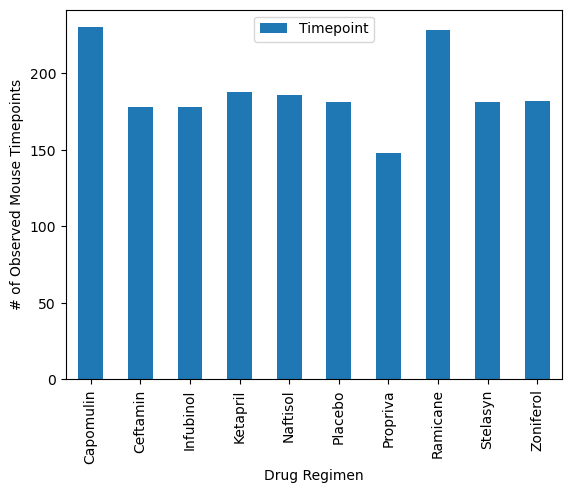

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_count_per_drug = study_mouse_work_df.groupby(['Drug Regimen'])['Timepoint'].count()
print(timepoints_count_per_drug)

timepoints_count_per_drug_df = pd.DataFrame({
    'Drug Regimen': timepoints_count_per_drug.index,
    'Timepoint': timepoints_count_per_drug.values})

timepoints_count_per_drug_df.plot.bar(x='Drug Regimen',rot=90)
plt.ylabel('# of Observed Mouse Timepoints')


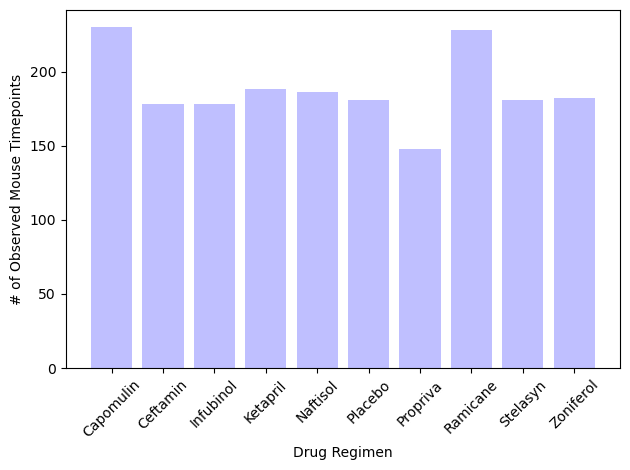

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoints_count_per_drug.index, timepoints_count_per_drug.values,color='b',alpha=0.25, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
# Show the plot
plt.tight_layout()
plt.show()

Sex
Male      50.957447
Female    49.042553
Name: count, dtype: float64
      Sex      Count
0    Male  50.957447
1  Female  49.042553


<Axes: ylabel='Count'>

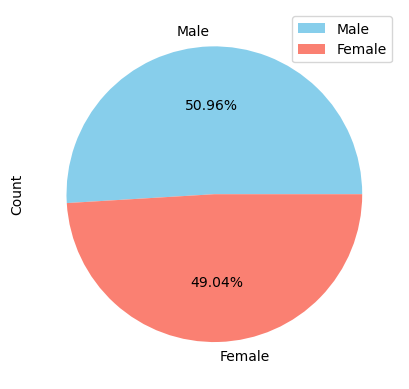

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_cnt = study_mouse_work_df['Sex'].size

gender_proportions = study_mouse_work_df['Sex'].value_counts()/total_cnt *100

print(gender_proportions)

gender_count_df = pd.DataFrame({'Sex':gender_proportions.index,
                                 'Count':gender_proportions.values})

print(gender_count_df.head())

# Make the pie chart
gender_count_plot = gender_count_df.plot.pie(
    y='Count',
    labels=gender_proportions.index,
    autopct='%1.2f%%',  # Show percentages
    colors=['skyblue', 'salmon']  # Custom colors
)

gender_count_plot


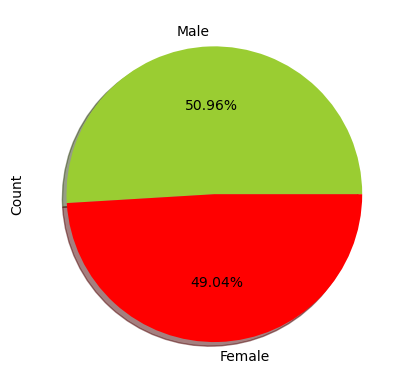

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_cnt = study_mouse_work_df['Sex'].size
gender_proportions = study_mouse_work_df['Sex'].value_counts()/total_cnt *100

# Make the pie chart
colors = ["yellowgreen", "red"]
explode = (0, 0)
plt.pie(gender_proportions, explode=explode, labels=gender_proportions.index, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=0)
plt.ylabel('Count')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
chosen_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_chosen = study_mouse_work_df[study_mouse_work_df['Drug Regimen'].isin(chosen_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_chosen.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint,final_tumor_chosen,on=['Mouse ID','Timepoint'])
print(final_tumor_df.head(20))

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
5      a520         45           38.810366                 1     Ramicane   
6      a577         30           57.031862                 2    Infubinol   
7      a644         45           32.978522                 1     Ramicane   
8      a685         45           66.083066                 3    Infubinol   
9      b128         45           38.982878                 2    Capomulin   
10     b447          0           45.000000                 0     Ceftamin   
11     b487         25           56.057749                 1     Ceftamin   

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.


# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_data = final_tumor_df['Tumor Volume (mm3)']

# add subset
quartiles = tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume  is: {upperq}")
print(f"The interquartile range of final tumor volume  is: {iqr}")
print(f"The median of final tumor volume  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of final tumor volume is: 37.1877438025
The upper quartile of final tumor volume  is: 59.930261755
The interquartile range of final tumor volume  is: 22.742517952499995
The median of final tumor volume  is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


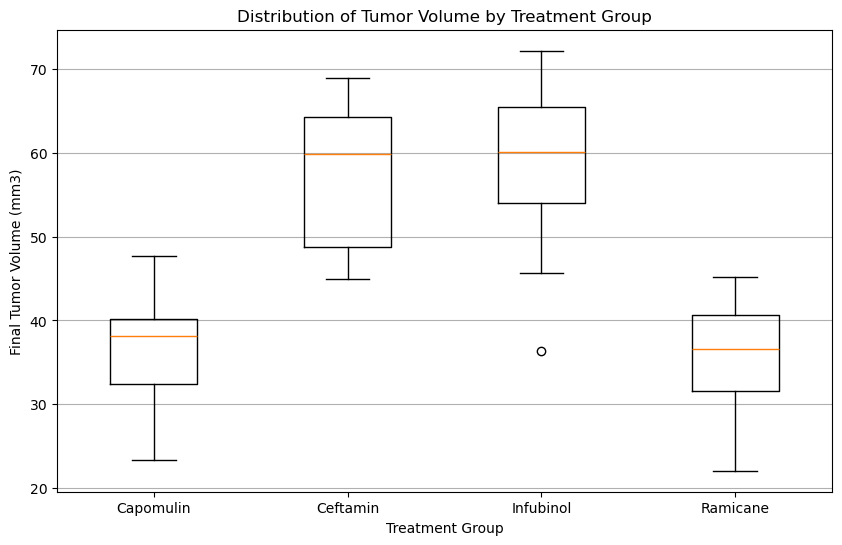

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
grouped_tumor_volumes = final_tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
# Creating the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_tumor_volumes, labels=grouped_tumor_volumes.index)
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

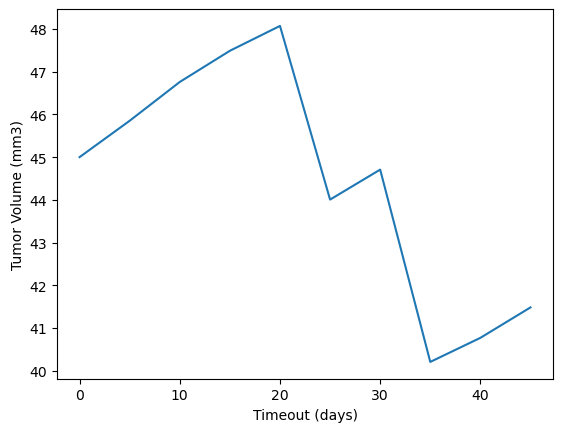

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = study_mouse_work_df.loc[study_mouse_work_df["Drug Regimen"] == "Capomulin", :]
mouse_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509", :]
y_tumor_vol = mouse_l509['Tumor Volume (mm3)']
x_timepoint = mouse_l509['Timepoint']
plt.xlabel("Timeout (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_timepoint, y_tumor_vol)
plt.show()

<class 'pandas.core.series.Series'>
MultiIndex: 25 entries, ('Capomulin', 'b128', 22) to ('Capomulin', 'y793', 17)
Series name: Tumor Volume (mm3)
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 732.0+ bytes
None


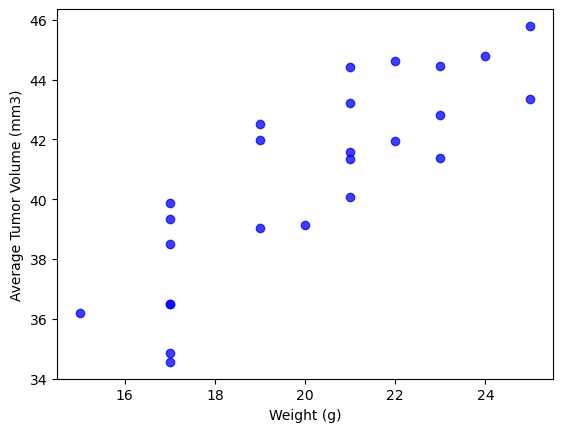

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data_df = study_mouse_work_df[study_mouse_work_df['Drug Regimen'] == 'Capomulin']
tumor_mean_gb_weight_drug = capomulin_data_df.groupby(["Drug Regimen","Mouse ID","Weight (g)"])['Tumor Volume (mm3)'].mean()
print(tumor_mean_gb_weight_drug.info())
plt.scatter(
    tumor_mean_gb_weight_drug.index.get_level_values(2), 
    tumor_mean_gb_weight_drug.values, 
    marker="o", 
    facecolors="b",
    alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


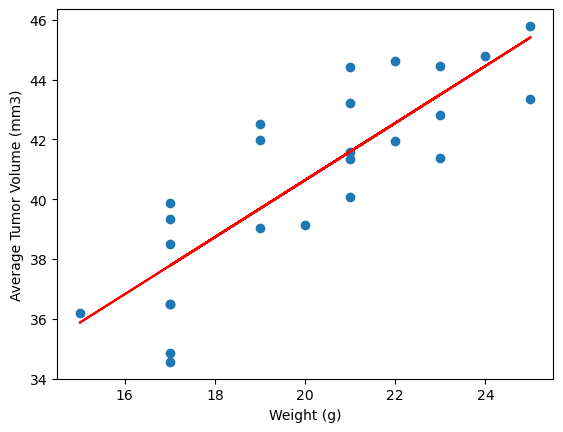

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = tumor_mean_gb_weight_drug.index.get_level_values(2)
y_values = pd.Series(tumor_mean_gb_weight_drug.values)
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is  {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()